## Installing Dependencies

In [1]:
pip install --upgrade git+https://github.com/mne-tools/mne-python@main

  Cloning https://github.com/mne-tools/mne-python (to revision main) to c:\users\imsan\appdata\local\temp\pip-req-build-l683j129
  Resolved https://github.com/mne-tools/mne-python to commit 8af33df490f94c3dd628cfc23beafed1a6cc6361
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/62.7 kB ? eta -:--:--
     ------                                   10.2/62.7 kB ? eta -:--:--
     ------------------                     30.7/62.7 kB 435.7 kB/s eta 0:00:01
     ------------------                     30.7/62.7 kB 435.7 kB/s eta 0:00:01
     ------------------                     30.7/62.7 kB 435.7 kB/s eta 0:00:01
     ------------------------               41.0/62.7 

  Running command git clone --filter=blob:none --quiet https://github.com/mne-tools/mne-python 'C:\Users\imsan\AppData\Local\Temp\pip-req-build-l683j129'

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

**import mne**: This line imports the MNE library, which is used for processing and analyzing neurophysiological data.

**import numpy as np**: This line imports the NumPy library, which is used for scientific computing.

**import os**: This line imports the os library, which provides functions for interacting with the operating system.

**import matplotlib.pyplot as plt**: This line imports the matplotlib.pyplot library, which is used for creating plots.

**%matplotlib qt**: This line sets the backend for matplotlib to be Qt, which allows interactive plotting.

**plt.ion()**: This line enables interactive mode for matplotlib, which allows us to update the plot in real time.

In [1]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib qt
plt.ion()


## Input Data

**Obtaining sample data folder:**

**sample_data_folder = mne.datasets.sample.data_path():**
This line uses the mne.datasets.sample.data_path() function to retrieve the path to the MNE sample data folder.
This folder contains various neurophysiological datasets for demonstration and testing purposes.

**Defining file path:**

**sample_data_raw_file= os.path.join(sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"):**
This line builds the full path to the sample auditory raw data file.
It uses the os.path.join() function to combine the sample_data_folder path with the relative path to the desired file.
"MEG" refers to the subfolder containing MEG datasets.
"sample" denotes the specific sample dataset.
"sample_audvis_raw.fif" is the filename of the raw data file in FIF format.

**Reading raw data:**

**raw = mne.io.read_raw_fif(sample_data_raw_file):**
This line reads the raw MEG data from the specified file using the mne.io.read_raw_fif() function.
This function parses the FIF file and creates an mne.io.Raw object containing the raw data and associated metadata.

In [2]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_folder

WindowsPath('C:/Users/imsan/mne_data/MNE-sample-data')

In [3]:
sample_data_raw_file= os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\imsan\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [4]:
print(raw)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>


**Copy and select channels:**

**eeg_and_eog = raw.copy().pick(picks=["eeg", "eog"]):**

This statement makes a copy of the original raw object using the .copy() method.
This is done to prevent any modifications to the original data.
Then, it selects only channels containing EEG and EOG signals using the .pick(picks=["eeg", "eog"]) method.
This method takes a list of channel names or types to select specific data channels.

**Printing data and info:**

**print(eeg_and_eog):**
This line prints the eeg_and_eog object to the console.
This will display a summary of the selected data, including the number of channels, sampling rate, and time duration.

**print(eeg_and_eog.info):** This line prints the info attribute of the eeg_and_eog object.
This attribute contains detailed information about the data, including channel names, locations, sensor types, sampling rate, and other important metadata.

In [6]:
eeg_and_eog = raw.copy().pick(picks=["eeg", "eog", "stim"])

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [7]:
print(eeg_and_eog)

<Raw | sample_audvis_raw.fif, 70 x 166800 (277.7 s), ~3.0 MB, data not loaded>


In [8]:
print(eeg_and_eog.info)

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 1 items (EEG 053)
 ch_names: STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, ...
 chs: 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 70
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>


**Assigning and cropping data:**

**eeg_raw=eeg_and_eog:**
This line assigns the eeg_and_eog object to a new variable named eeg_raw.
This is done for easier reference and to avoid confusion with the original data.

**eeg_raw.crop(tmax=60).load_data():**
This statement uses the .crop() method to trim the data to a specific time window.
Here, it sets the maximum time to 60 seconds, meaning only the first 60 seconds of the data will be kept.
Then, it calls the .load_data() method to actually load the cropped data into memory.
This is necessary before performing any further analysis.

**Plotting the data:**

**eeg_raw.plot():**
This line uses the .plot() method to visualize the cropped EEG data.
By default, this method plots all channels together on separate subplots.
This allows us to visually inspect the EEG signals and identify any potential artifacts or abnormalities.

Reading 0 ... 36037  =      0.000 ...    60.000 secs...
Using matplotlib as 2D backend.


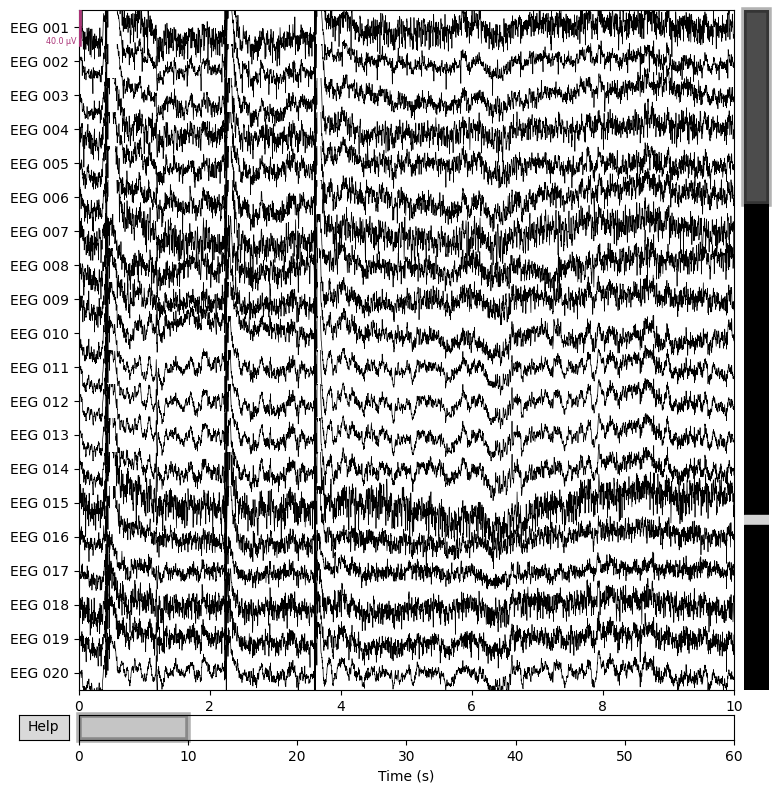

Channels marked as bad:
['EEG 053']


In [9]:
eeg_raw=eeg_and_eog
eeg_raw.crop(tmax=60).load_data()
eeg_raw.plot()


**Computing power spectral density:**

**spectrum = eeg_raw.compute_psd():**
This line uses the .compute_psd() method to calculate the power spectral density (PSD) of the EEG data.
PSD provides information about the distribution of power across different frequency bands in the EEG signal.
This allows us to analyze the dominant frequencies in the data and identify any relevant brain activity.

**Plotting PSD:**

**spectrum.plot(average=True, picks="data", exclude="bads"):**
This line creates a plot of the calculated PSD using the .plot() method.
The average=True option averages the PSD across all channels, resulting in a single plot representing the overall power distribution.
The picks="data" option specifies that only data channels will be included in the plot, excluding any bad channels marked as such.
The exclude="bads" option ensures that channels marked as bad are not included in the average calculation.
This plot provides a visual representation of the dominant frequencies in the EEG data and helps us identify any relevant activity across the frequency spectrum.

Effective window size : 3.410 (s)


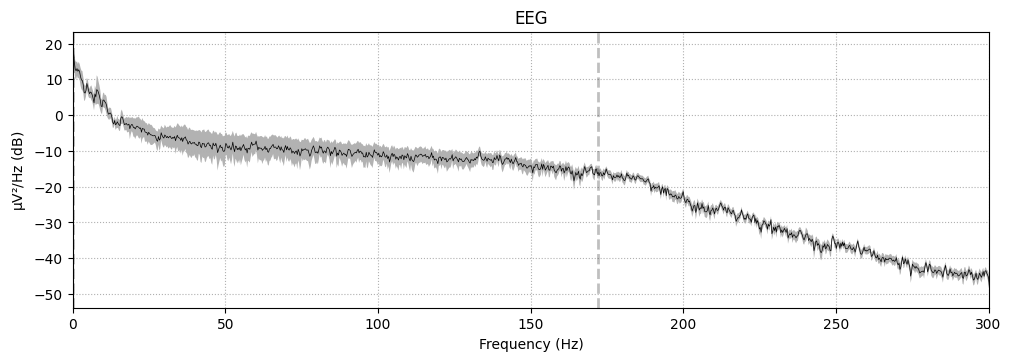

In [10]:
spectrum = eeg_raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

**Defining midline electrodes:**

**midline = ["EEG 002", "EEG 012", "EEG 030", "EEG 048", "EEG 058", "EEG 060"]:**
This line defines a list named midline containing channel names for electrodes located on the midline of the head.
These channels are often used for analysis due to their relatively low susceptibility to external noise and artifacts.

**Plotting midline PSD:**

**spectrum.plot(picks=midline, exclude="bads"):**
This line utilizes the .plot() method of the pre-calculated spectrum object.
The picks=midline argument specifies that only power spectral density (PSD) for the defined midline channels should be plotted.
The exclude="bads" option ensures that bad channels marked as such are not included in the plot.
This allows for focused analysis of brain activity in the midline region, excluding potentially noisy or unreliable data.

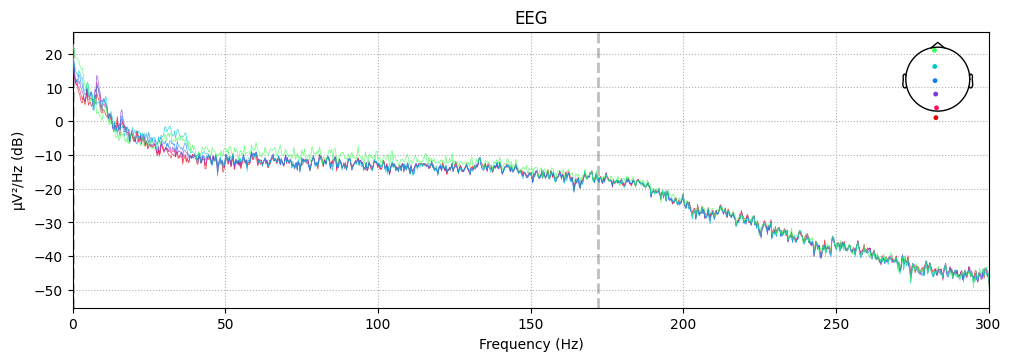

In [11]:
midline = ["EEG 002", "EEG 012", "EEG 030", "EEG 048", "EEG 058", "EEG 060"]
spectrum.plot(picks=midline, exclude="bads")

**Plot PSD Topomap:**

**spectrum.plot_topomap():**
This line uses the plot_topomap() method of the spectrum object.
This method generates a topographic map of the power spectral density (PSD) across all channels.
The map displays the distribution of power at different frequencies on the scalp, visualized by color gradients.
This provides a holistic view of the brain activity and helps identify areas with high or low power at specific frequencies.

**Plot EEG Sensor Locations:**

**raw.plot_sensors(ch_type="eeg"):**
This line calls the plot_sensors() method of the raw object.
This method visualizes the locations of all EEG sensors on the scalp.
The ch_type="eeg" argument specifies that only EEG channels are plotted.
This allows us to overlay the PSD topomap on the sensor layout, providing a clearer understanding of which brain regions correspond to specific power distributions.

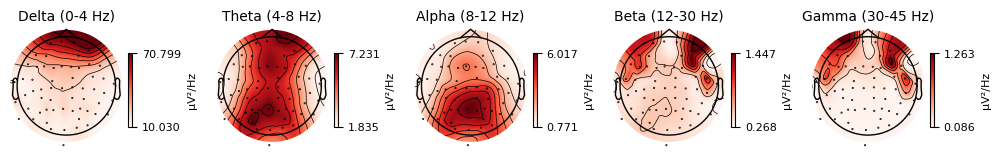

In [12]:
spectrum.plot_topomap()

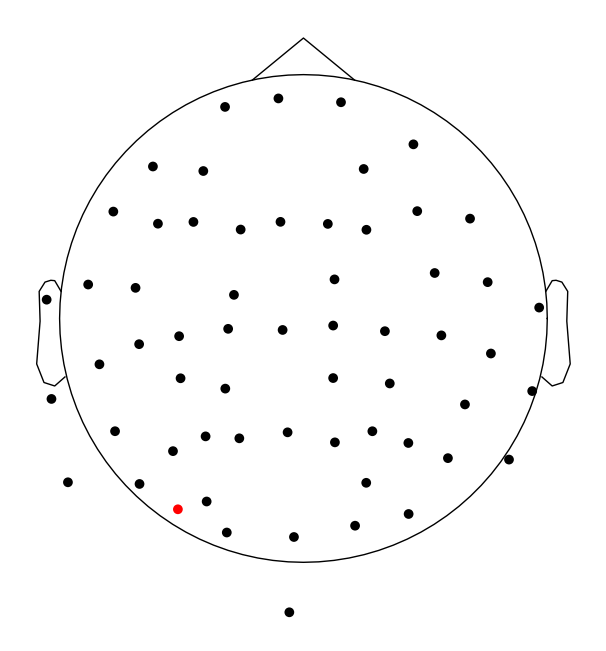

In [13]:
raw.plot_sensors(ch_type="eeg")

**Selecting channels with heartbeats and blinks:**

**regexp = r"(MEG [12][45][123]1|EEG 00.)":**
This line defines a regular expression that captures the names of specific channels.
The expression includes two parts:
MEG [12][45][123]1: This matches the naming convention of MEG channels around the heart and eyes, known to show prominent heartbeat and blink artifacts.
EEG 00.: This matches EEG channels around the eyes, also likely to capture blink artifacts.
artifact_picks = mne.pick_channels_regexp(eeg_raw.ch_names, regexp=regexp):
This line uses the mne.pick_channels_regexp() function to select channels based on the defined regular expression.
This ensures that only channels with expected heartbeat and blink signals are chosen for further analysis.

**Plotting selected channels:**

**eeg_raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False):**
This line plots the selected channels using the plot() method of the eeg_raw object.
The order=artifact_picks argument specifies the order in which the channels are plotted.
The n_channels=len(artifact_picks) option ensures that all selected channels are displayed.
The show_scrollbars=False option removes unnecessary scrollbars from the plot.
This visualization allows you to observe the raw data from channels known to capture heartbeat and blink artifacts, facilitating their identification and analysis.

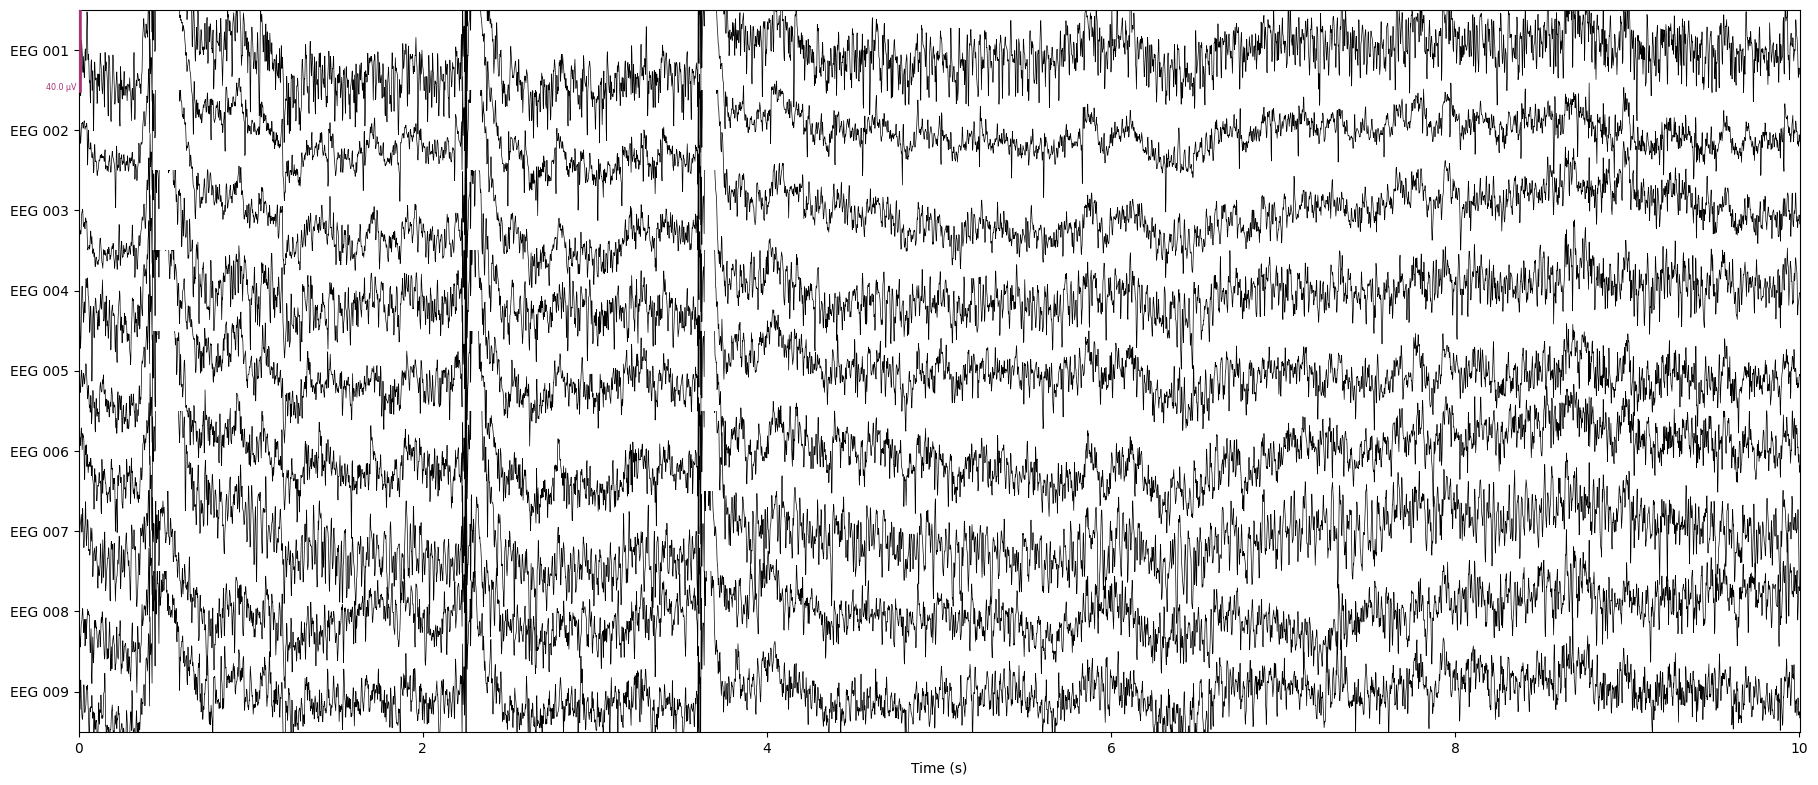

Channels marked as bad:
['EEG 053']


In [15]:
# pick some channels that clearly show heartbeats and blinks
regexp = r"(MEG [12][45][123]1|EEG 00.)"
artifact_picks = mne.pick_channels_regexp(eeg_raw.ch_names, regexp=regexp)
eeg_raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)

## DATA PREPROCESSING

**Importing modules:**

**from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs:**
This line imports several functions from the MNE preprocessing module needed for further analysis.
These include:
ICA: Independent Component Analysis for artifact removal
corrmap: Function for calculating and plotting channel correlations
create_ecg_epochs: Function for creating epochs containing heartbeat artifacts
create_eog_epochs: Function for creating epochs containing blink artifacts

**Creating EOG epochs:**

**eog_evoked = create_eog_epochs(eeg_raw).average():**
This line utilizes the create_eog_epochs function to extract epochs containing blink artifacts from the raw EEG data.
It then averages these epochs to create a single representative evoked response for blinks.

**Applying baseline correction:**

**eog_evoked.apply_baseline(baseline=(None, -0.2)):**
This line applies baseline correction to the averaged blink response.
It sets the baseline period to the last 200ms of the epoch, excluding any pre-stimulus activity.
This ensures a more accurate representation of the blink artifact itself.

**Plotting evoked response:**

**eog_evoked.plot_joint():**
This line utilizes the plot_joint() method of the averaged blink response.
This method provides a comprehensive visualization of the evoked response, including its time course, scalp topography, and power spectrum.
This allows for detailed analysis of the blink artifact, including its morphology, spatial distribution, and frequency content.

Using EOG channel: EOG 061
EOG channel index for this subject is: [69]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG 061 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
No baseline correction applied
Using data from preloaded Raw for 10 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correct

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


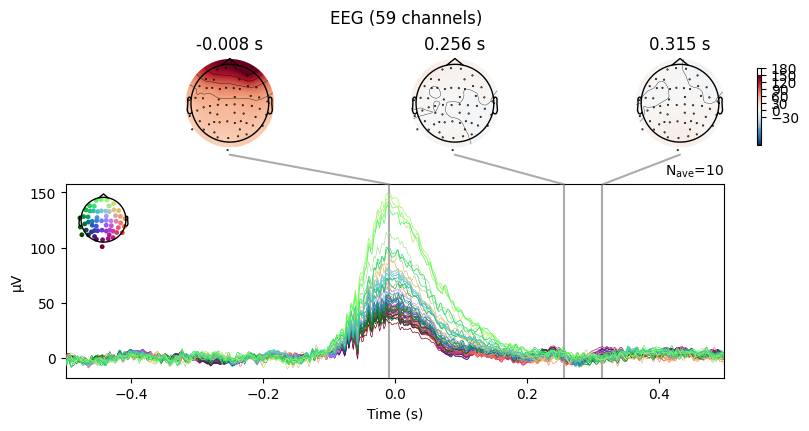

In [16]:
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

eog_evoked = create_eog_epochs(eeg_raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

**Implementing ICA:**

**ica = ICA(n_components=15, max_iter="auto", random_state=97):**
This line defines and initializes an ICA object using the ICA class from MNE.
It sets the following parameters:
n_components=15: This specifies the number of independent components (ICs) to be estimated. This number should be chosen based on the data and the desired level of detail in the decomposition.
max_iter="auto": This automatically sets the maximum number of iterations for the ICA algorithm. This ensures sufficient convergence while avoiding unnecessary computations.
random_state=97: This sets the random seed for the ICA algorithm. This ensures reproducibility of results across different runs.

**Fitting ICA to EEG data:**

**ica.fit(eeg_raw):**
This line applies the ICA algorithm to the pre-processed EEG data stored in the eeg_raw object.
This decomposes the data into a set of independent components, each representing a statistically independent source of activity in the brain.

**Printing ICA object:**

**ica:**
This line simply prints the ica object to the console.
This may not be directly insightful in itself, but it can be useful for debugging purposes and accessing the various attributes and methods available for further analysis.

In [17]:
ica = ICA(n_components=15, max_iter="auto", random_state=97)
ica.fit(eeg_raw)
ica

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 28.8s.


c:\users\imsan\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (36038 samples)
ICA components,15
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


**Calculating explained variance ratio:**

**explained_var_ratio = ica.get_explained_variance_ratio(eeg_raw):**
This line calls the get_explained_variance_ratio method of the ica object.
This method calculates the proportion of variance in the EEG data explained by each independent component (IC) and for different channel types (e.g., EEG, EOG).

**Printing explained variance:**

**for channel_type, ratio in explained_var_ratio.items():**

This line iterates over each channel type and its corresponding explained variance ratio.
The items() method retrieves both the key (channel type) and the value (ratio) from the explained_var_ratio dictionary.
print(f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"):

This line prints a formatted string that includes the channel type and its corresponding explained variance ratio.
This provides a clear and concise overview of how much variance is explained by all ICs combined for each type of channel.

In [19]:
explained_var_ratio = ica.get_explained_variance_ratio(eeg_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.9863587722436372


**Calculating explained variance ratio for specific components:**

**explained_var_ratio = ica.get_explained_variance_ratio(eeg_raw, components=[0], ch_type="eeg"):**
This line again calls the get_explained_variance_ratio method of the ica object.
However, it now specifies two additional arguments:
components=[0]: This restricts the calculation to only the first IC (component 0).
ch_type="eeg": This focuses the calculation on EEG channels only.
This allows us to analyze the specific contribution of the first IC to the variance of the EEG data.

**Printing explained variance as percentage:**

**ratio_percent = round(100 * explained_var_ratio["eeg"]):**

This line retrieves the explained variance ratio for "eeg" channels from the dictionary returned by get_explained_variance_ratio.
It then multiplies it by 100 and rounds the result to the nearest integer, converting the ratio to a percentage.
print(f"Fraction of variance in EEG signal explained by first component: " f"{ratio_percent}%"):

This line prints a formatted string that includes the statement and the calculated percentage.
This provides a more concise and informative way to interpret the explained variance of the first IC for EEG signals.

In [20]:
explained_var_ratio = ica.get_explained_variance_ratio(
    eeg_raw, components=[0], ch_type="eeg"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["eeg"])
print(
    f"Fraction of variance in EEG signal explained by first component: "
    f"{ratio_percent}%"
)

Fraction of variance in EEG signal explained by first component: 93%


**Loading EEG data:**

**eeg_raw.load_data():**
This line calls the load_data method of the eeg_raw object.
This ensures that the actual EEG data is loaded into memory before plotting the ICA sources.
This is necessary because the plot_sources method uses the data to visualize the spatial distribution of each independent component.


**Plotting ICA sources:**

**ica.plot_sources(raw, show_scrollbars=False):**
This line utilizes the plot_sources method of the ica object.
The raw argument specifies which data object to use for visualization.
The show_scrollbars=False option removes unnecessary scrollbars from the plot.
This method visualizes the spatial distribution of each independent component (IC) on the scalp topography.
This allows you to identify the brain regions most associated with each IC and assess its potential contribution to the observed brain activity.

Creating RawArray with float64 data, n_channels=16, n_times=166800
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


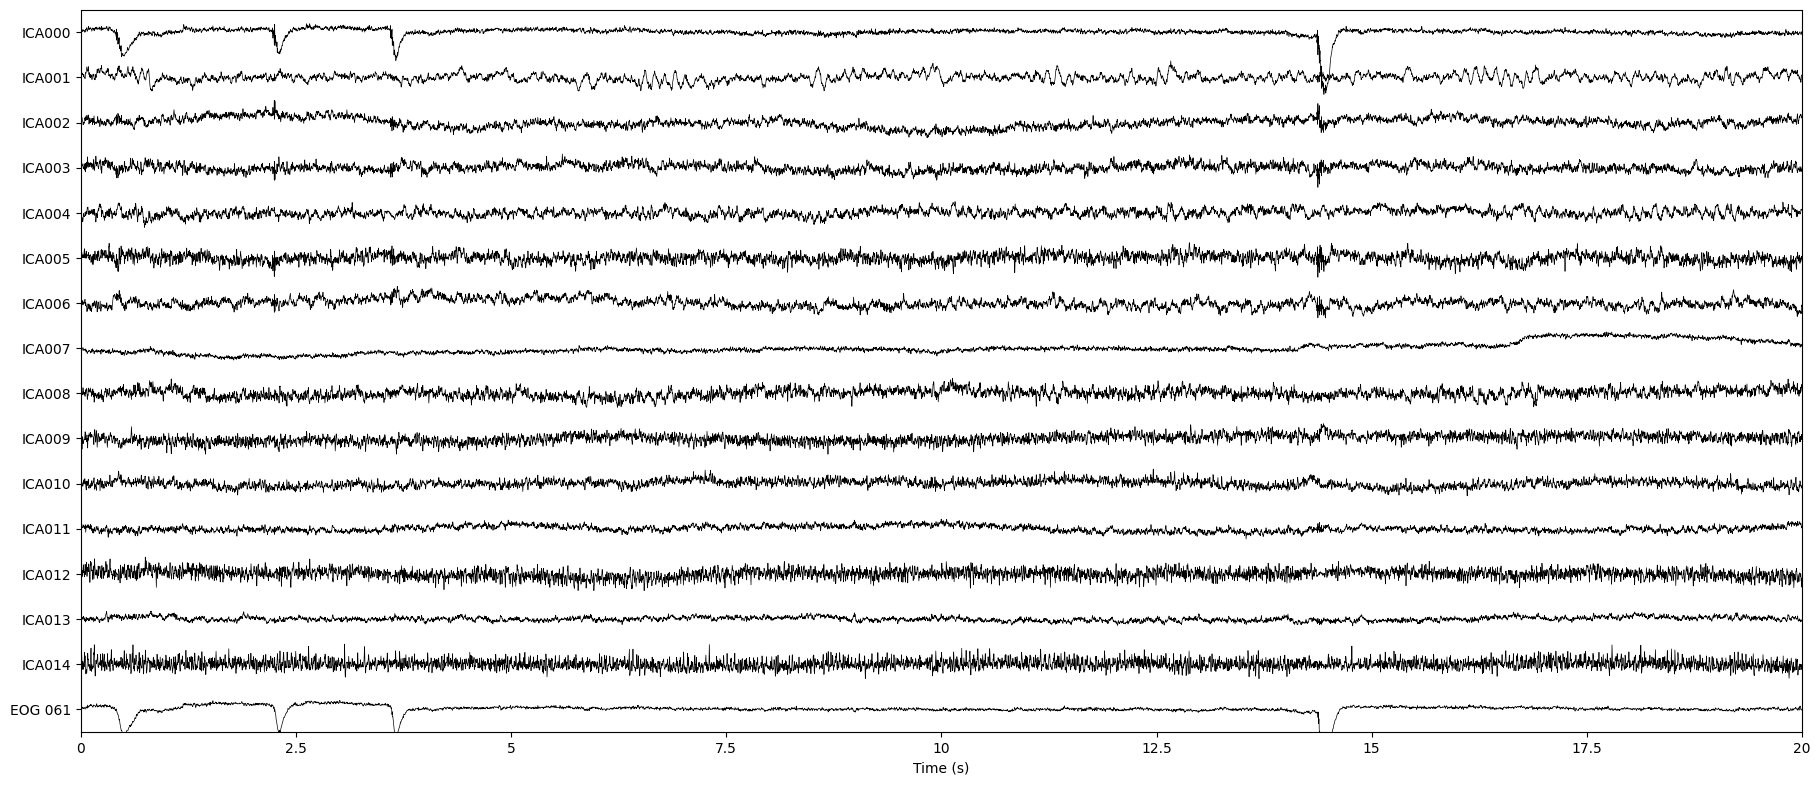

In [22]:
eeg_raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

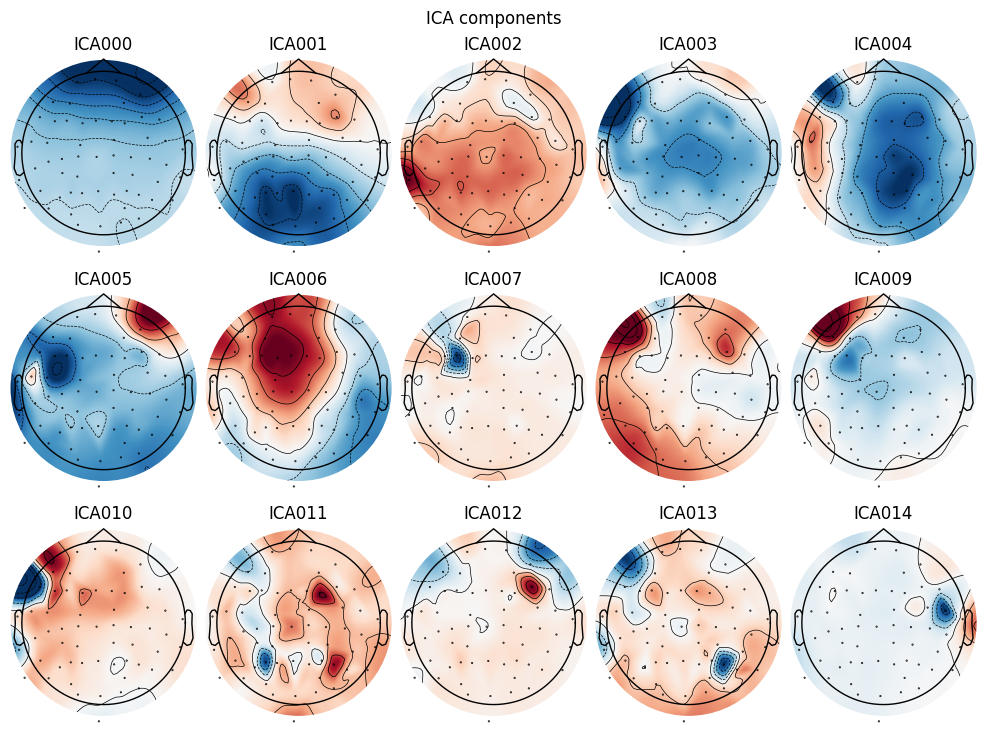

In [23]:
ica.plot_components() # refers to plotting the independent components (ICs) obtained from applying ICA to the EEG data.

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 59 PCA components


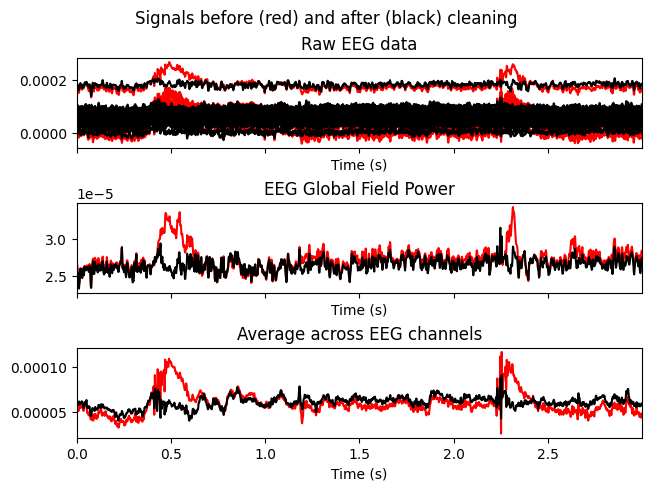

In [24]:
# blinks
ica.plot_overlay(eeg_raw, exclude=[0], picks="eeg")
# refers to visualizing the ICA decomposition results overlaid on the original EEG data.

**Making a copy of the EEG data:**

**reconst_raw = eeg_raw.copy():**
This line creates a copy of the original eeg_raw object using the copy method.
This ensures that the original data remains untouched even after applying the ICA decomposition.
This practice is recommended because the ica.apply method modifies the data in-place.

**Applying ICA to the copy:**

**ica.apply(reconst_raw):**
This line calls the apply method of the ica object on the reconst_raw copy.
This applies the ICA decomposition to the copied data, removing the identified independent components.

**Plotting original and reconstructed data:**

**eeg_raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False):**
This line plots the original eeg_raw data using the plot method.
The order=artifact_picks argument specifies the order in which the channels are plotted, focusing on the channels with prominent artifacts.
The n_channels=len(artifact_picks) option ensures all selected channels are displayed.
The show_scrollbars=False option removes unnecessary scrollbars.
reconst_raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False):
This line plots the reconstructed reconst_raw data using the same plot arguments as the original data.
This allows a side-by-side comparison of the original and ICA-filtered data, visually highlighting the removed artifacts.

**Deleting the copy:**

del reconst_raw:
This line deletes the reconst_raw object after it is no longer needed.
This helps with memory management and avoids unnecessary objects in the workspace.

In [25]:
reconst_raw = eeg_raw.copy()
ica.apply(reconst_raw)

eeg_raw.plot(order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)
reconst_raw.plot(
    order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False
)
del reconst_raw

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 59 PCA components
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']


**Identifying and excluding EOG artifacts:**

**ica.exclude = []:**
This line initializes an empty list for storing the indices of ICs identified as EOG artifacts.

**eog_indices, eog_scores = ica.find_bads_eog(eeg_raw):**
This line calls the find_bads_eog method of the ica object.
This method analyzes the ICs and identifies those matching the EOG artifact pattern based on their spatial distribution and temporal characteristics.

**It returns two lists:**

**eog_indices:** This list contains the indices of the ICs identified as EOG artifacts.
**eog_scores:** This list contains the EOG match scores for each IC, indicating the confidence of the EOG detection.

**ica.exclude = eog_indices:**
This line updates the ica.exclude attribute with the list of identified EOG ICs.
This tells the ICA object to exclude these components when applying the decomposition to the data.

**Visualizing EOG artifact analysis:**

**ica.plot_scores(eog_scores):**
This line generates a bar plot of the EOG match scores for all ICs.
This allows you to visually assess the confidence levels of EOG identification for each component.

**ica.plot_properties(eeg_raw, picks=eog_indices):**
This line utilizes the plot_properties method to display various diagnostics for the identified EOG ICs.
This includes information like time courses, scalp maps, and frequency spectra, providing a detailed view of their characteristics.

**ica.plot_sources(eeg_raw, show_scrollbars=False):**
This line calls the plot_sources method to visualize the spatial distribution of the ICs on the scalp.
This plot highlights the EOG artifacts identified and allows you to understand their location on the head.

**ica.plot_sources(eog_evoked):**
This line applies the plot_sources method to the averaged EOG response.
It highlights the identified EOG ICs in this specific context, providing additional insights into their contribution to the blink artifact.

Using EOG channel: EOG 061
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=16, n_times=36038
    Range : 25800 ... 61837 =     42.956 ...   102.956 secs
Ready.


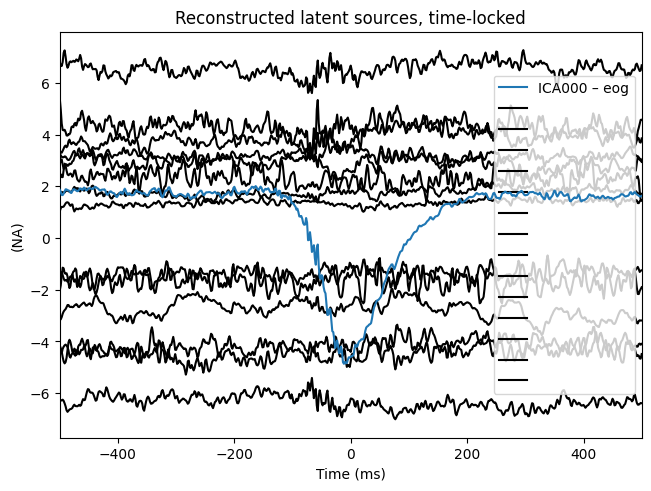

In [28]:
ica.exclude = []

eog_indices, eog_scores = ica.find_bads_eog(eeg_raw)
ica.exclude = eog_indices

ica.plot_scores(eog_scores)

ica.plot_properties(eeg_raw, picks=eog_indices)

ica.plot_sources(eeg_raw, show_scrollbars=False)

ica.plot_sources(eog_evoked)